In [10]:
#Predict the percentage of an student based on the no. of study hours.

# Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 # for viewing on jupyter notebook
%matplotlib inline   


In [7]:
#Loading the dataset
dataset = pd.read_csv('http://bit.ly/w-data')
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [9]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [14]:
dataset.isnull()

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


Text(0, 0.5, 'Percentage Scored')

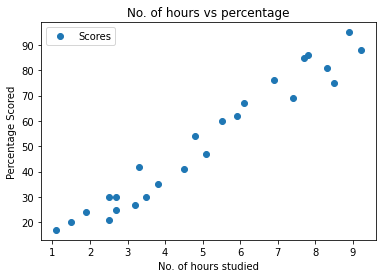

In [21]:
#plotting the data distribution
dataset.plot(x='Hours',y='Scores',style='o')
plt.title('No. of hours vs percentage')
plt.xlabel('No. of hours studied')
plt.ylabel('Percentage Scored')

In [29]:
#Conversion to 2D array or a dataframe
X_features = dataset.iloc[:, :-1].values  
Y_target = dataset.iloc[:, 1].values

In [30]:
from sklearn.linear_model import LinearRegression
LineReg = LinearRegression()
LineReg.fit(X_features,Y_target)


LinearRegression()

In [31]:
print('The estimated intercept %.2f'%LineReg.intercept_)

The estimated intercept 2.48


In [32]:
print('The  co-efficient  %d '%len(LineReg.coef_))

The  co-efficient  1 


In [33]:
#Split Dataset into training and testing
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X_features,Y_target)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(18, 1) (7, 1) (18,) (7,)


In [34]:
#fit training sets into model
LineReg.fit(X_train,Y_train)

LinearRegression()

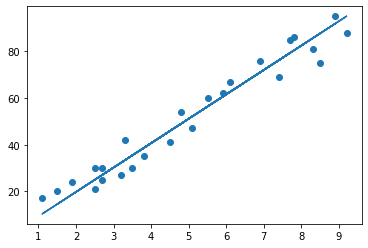

In [40]:
# Plotting the regression line
line = LineReg.coef_*X_features+LineReg.intercept_

# Plotting for the test data
plt.scatter(X_features, Y_target)
plt.plot(X_features, line);
plt.show()

In [35]:
#Evaluationg the model

#mean square error or residual sum of squares
print('MSE value is %.2f'%np.mean((LineReg.predict(X_test)-Y_test)**2))

MSE value is 51.13


In [36]:
#calculate variance -----> the closer the value to 1 the higher is the accuracy
print ('Variance is %.2f ' % LineReg.score(X_test,Y_test))

Variance is 0.93 


In [43]:
Y_pred = LineReg.predict(X_test)

# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})  
df

,Actual,Predicted
0,30,27.106512
1,54,49.055556
2,95,91.908449
3,88,95.044027
4,75,87.727679
5,20,14.564202
6,42,33.377668


In [57]:
#What will be predicted score if a student studies for 9.25 hrs/ day?
print("Percentage Scored = ")
print(LineReg.predict([[9.25]]))

Percentage Scored = 
[95.56662311]
